IMPORTING  LIBRARIES

In [1]:
#INITIALIZATION:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the Dataset

Load The Data




In [2]:
housing = pd.read_csv(r'\Users\User\Documents\housing.csv')

In [3]:
use_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value"]

In [4]:
data = pd.read_csv('housing.csv', usecols=use_cols)

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
#inspecting the Dataset
data.shape

(20640, 9)

EXPLORATORY DATA ANALYSIS:

Question 1

Find a feature with missing values. How many missing values does it have?

In [7]:
#inspecting the dataset to know the null values and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer for Questions 1: "total_bedrooms" = 207


NULL VALUES CHECKER:

In [9]:
#@ INSPECTING NULL VALUES:
incomplete = data.isna().mean()*100
print(incomplete[incomplete > 0])

total_bedrooms    1.002907
dtype: float64


In [10]:
#@ INSPECTING NULL VALUES:
data.isna().any()


longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

DUPLICATES:

In [11]:
#@ INSPECTING DUPLICATES:
data.duplicated().value_counts()

False    20640
dtype: int64

DESCRIPTIVE ANALYSIS:

Question 2

What's the median (50% percentile) for variable 'population'?

In [12]:
#Getting the descriptive analysis and percentile and the transposing the columns
data.describe(percentiles =[0,0.25,0.5,0.75,0.90,0.99,0.1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,500001.00000,500001.0000


Answer for Question 2: "population" = 1166.0

C:\Users\User\AppData\Local\Temp\ipykernel_468\2433912860.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",


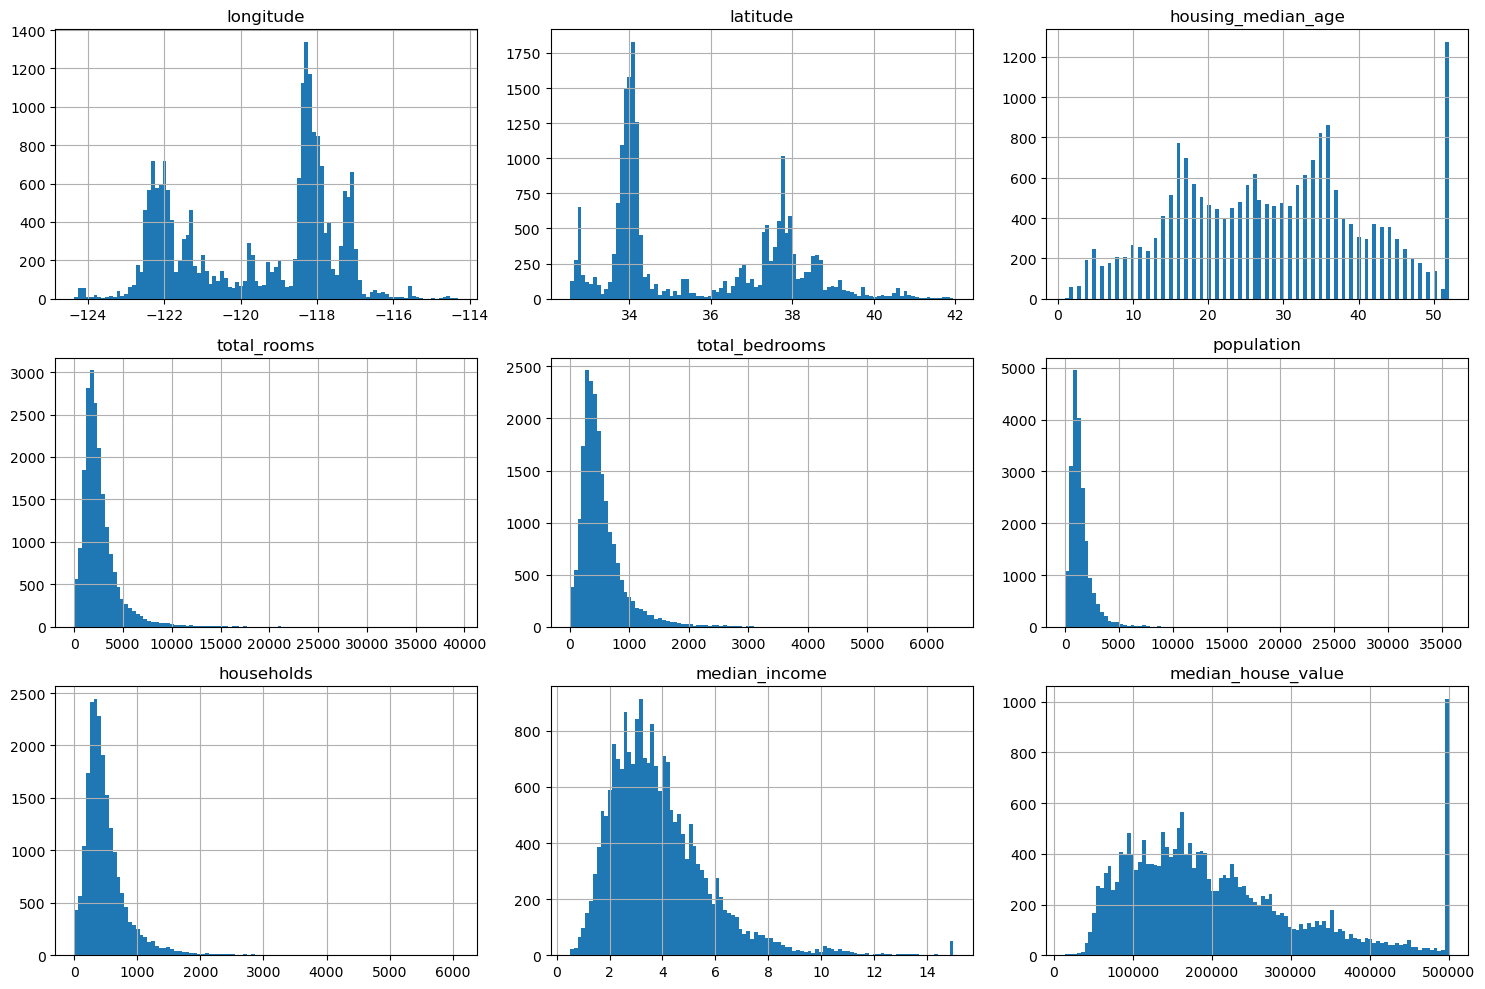

In [13]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
data.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Newfolder\envs\ml-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


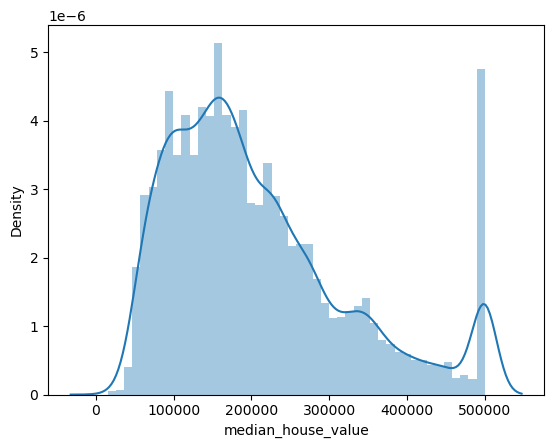

In [14]:
#inspecting the house_median_value
sns.distplot(data.median_house_value);

C:\Users\User\anaconda3\Newfolder\envs\ml-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


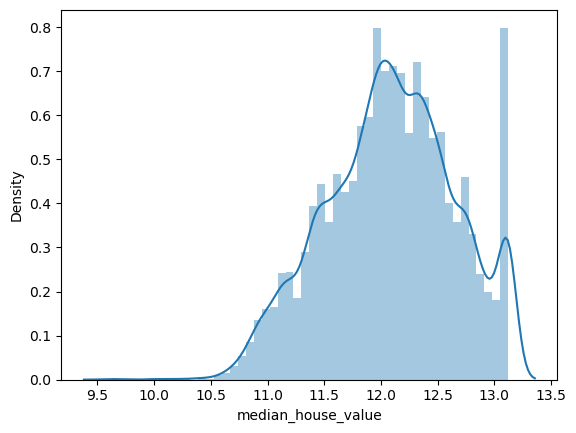

In [15]:
sns.distplot(np.log1p(data.median_house_value));

Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.
    
Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

SIMPLE LINEAR REGRESSION:

In [16]:
#@ FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

DATASET PREPARATION:

In [17]:
#splitting the dataset
# 60 , 20, 20 spread
n = len(data)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

Splitting  the data and using random seed 42

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [18]:
#shuffling the dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = data.iloc[idx]

In [19]:
#PREPARING THE LABELS:
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_train+n_val:]]

In [20]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test= df_test.reset_index(drop = True)

In [21]:
#PREPARING THE LABELS:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values


In [22]:
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [23]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [24]:
#@ PREPARING THE DATASET:
check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [25]:
#FUNCTION FOR RMSE VALUES:

#@ FUNCTION FOR RMSE VALUES:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [26]:
#@ FILLING MISSING VALUES:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [27]:
#@ FILLING MISSING VALUES:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)


In [28]:
#@ GETTING RMSE SCORE:
np.round(rmse(y_val, y_mean_pred_val),2)

0.34

filling na with zero

In [29]:
X_train_zero = prepare_X(df_train,0)
w_0_zero,w_zero = train_linear_regression(X_train_zero, y_train)

X_zero_val = prepare_X(df_val,0)
y_zero_pred_val = w_0_zero + X_zero_val.dot(w_zero)



In [30]:
#@ GETTING RMSE SCORE:
np.round(rmse(y_val, y_zero_pred_val),2)

0.34

Answer for Question 3: Both are equally good.

Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    
Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

REGULARIZATION:

In [31]:
def train_linear_regression_reg(X,y, r=0.0):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [32]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_zero_reg_val = w_0 + X_zero_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_zero_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.656344590120039 0.34
1e-06 -11.656328700669025 0.34
0.0001 -11.65475589538141 0.34
0.001 -11.64047710367771 0.34
0.01 -11.499589723007698 0.34
0.1 -10.257998427257288 0.34
1 -4.931613572866043 0.35
5 -1.489184857487396 0.35
10 -0.7941313736881417 0.35


Answer for Question 4 is 0.

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [33]:
rmse_scores = []

idx = np.arange(n)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_shuffled = data.iloc[idx]
    
    df_train = df_shuffled.iloc[idx[:n_train]]
    df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
    df_test = df_shuffled.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test= df_test.reset_index(drop = True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
   
    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    X_train_zero = prepare_X(df_train,0)
    w_0, w = train_linear_regression_reg(X_train_zero, y_train)
                                         
    X_zero_val = prepare_X(df_val,0)
    y_zero_reg_val = w_0_zero + X_zero_val.dot(w_zero)

                                     
    y_zero_reg_val = w_0 + X_zero_val.dot(w)
    
    rmse_scores.append(rmse_val)
    
    rmse_val = np.round(rmse(y_val, y_zero_reg_val),2)
    print(r, w_0, rmse_val)

10 -11.671785909124427 0.35
10 -11.657881634029582 0.34
10 -11.878263966361217 0.34
10 -11.814432443972919 0.35
10 -11.278737896658772 0.34
10 -11.37137572169308 0.34
10 -11.464764994518688 0.33
10 -11.791970473481472 0.35
10 -11.063710533537401 0.34
10 -11.472266574330911 0.34


In [34]:
#@ INSPECTING THE RMSE LIST:
rmse_scores


[0.35, 0.35, 0.34, 0.34, 0.35, 0.34, 0.34, 0.33, 0.35, 0.34]

In [35]:
#@ INSPECTING THE RMSE:
np.round(np.std(rmse_scores),3)

0.006

In [36]:
r =9
idx = np.arange(n)

np.random.seed(seed)
np.random.shuffle(idx)
df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test= df_test.reset_index(drop = True)
    
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values
   
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)
    
del df_train["median_house_value"]
del df_test["median_house_value"]
    
X_train_zero = prepare_X(df_train,0)
w_0, w = train_linear_regression_reg(X_train_zero, y_train)
                                         
X_zero_val = prepare_X(df_val,0)
y_zero_reg_val = w_0_zero + X_zero_val.dot(w_zero)

                                     
y_zero_reg_val = w_0 + X_zero_val.dot(w)
    
rmse_scores.append(rmse_val)
    
rmse_val = np.round(rmse(y_val, y_zero_reg_val),2)
print(r, w_0, rmse_val)

9 -11.78519018946436 0.34


Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001
.
What's the RMSE on the test dataset?

In [37]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [38]:
# INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35